In [1]:
'''
data-extractor.py

Trying to extract data from dataset 2
Target result: EEG, labels, channels, frequency
'''

'\ndata-extractor.py\n\nTrying to extract data from dataset 2\nTarget result: EEG, labels, channels, frequency\n'

In [1]:
# get dependency
import numpy as np
import scipy.io

In [2]:
# load matlab files
t = scipy.io.loadmat('/home/dhz/bci-data/data/A01T.mat', struct_as_record=True)

In [3]:
# show the keys of matlab files
t.keys()

dict_keys(['__header__', '__version__', '__globals__', 'h', 's'])

In [4]:
print(t['s'].shape)
signals = t['s']

(672528, 25)


In [5]:
typ = t['h']['EVENT'][0][0]['TYP'][0][0] # type of the event

In [6]:
pos = t['h']['EVENT'][0][0]['POS'][0][0] # position of the event happened in timeline

In [7]:
dur = t['h']['EVENT'][0][0]['DUR'][0][0] # duration of the event

In [8]:
print('shape of typ', typ.shape)
print('shape of pos', pos.shape)
print('shape of dur', dur.shape)

shape of typ (603, 1)
shape of pos (603, 1)
shape of dur (603, 1)


In [9]:
artifact_selection = t['h']['ArtifactSelection'][0][0]

In [10]:
print(artifact_selection.shape)

(288, 1)


In [11]:
C3 = signals[:, 7]
Cz = signals[:, 9]
C4 = signals[:, 11]
chan_list = ['C3', 'Cz', 'C4']
signal_list = [C3, Cz, C4]

In [12]:
print(C3)

[-22.50976562 -22.75390625 -20.41015625 ...  11.96289062   4.34570312
   4.83398438]


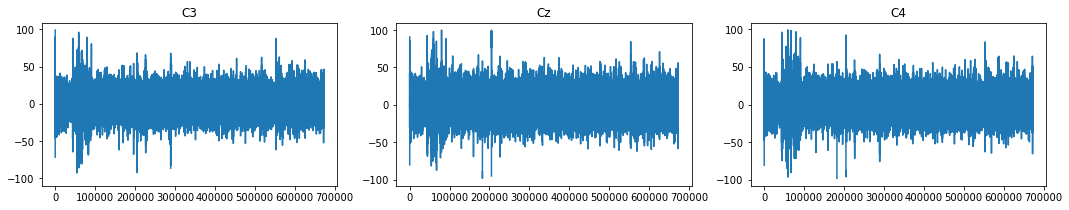

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def signal_overview(signals, names):
    '''
    show the overview of EEG signals
    
    Parameters
    ---------
    signals: 2-d array
        the EEG signal data
    names: 1-d array
        the list of channels name
    '''
    plt.figure(figsize = (18, 3))
    for i in range(len(names)):
        plt.subplot(1, len(names), i + 1)
        plt.title(names[i])
        plt.plot(signals[i])
    plt.show()

signal_overview(signal_list, chan_list)

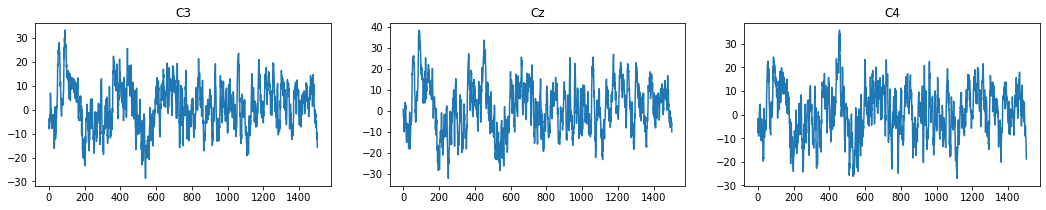

In [14]:
event_dict = {276: 'Idling EEG', 277: 'Idling EEG', 768: 'Start of a trial',
            769: 'Cue onset left (class 1)', 770: 'Cue onset right (class 2)',
            771: 'Cue onset foot (class 3)', 772: 'Cue onset tongue (class 4)',
            783: 'Cue unknown', 1023: 'Rejected trial', 1072: 'Eye movements',
            32766: 'Start of a new run'}

signal_overview([tmp[int(pos[8]):int(pos[9])] for tmp in signal_list],chan_list)

In [15]:
def eeg_classification(typ, pos, dur):
    '''
    put EEG signals into small pieces
    
    Parameters
    ---------
    typ: 1-d array
        the EEG signal type list
    pos: 1-d array
        the EEG signal position list
    dur: 1-d array
        the EEG signal duration list
        
    Return
    ------
    result: 3-d array
        classified EEG signal, from 769 to 772
    '''
    tag_class = [769, 770, 771, 772]
    result = {769: [], 770: [], 771: [], 772: []}
    for i in range(len(typ)):
        if(typ[i] in tag_class):
            result[int(typ[i])].append([tmp[int(pos[i]):(int(pos[i]) + int(dur[i]))] for tmp in signal_list])
    return result
eeg_dataset = eeg_classification(typ, pos, dur)

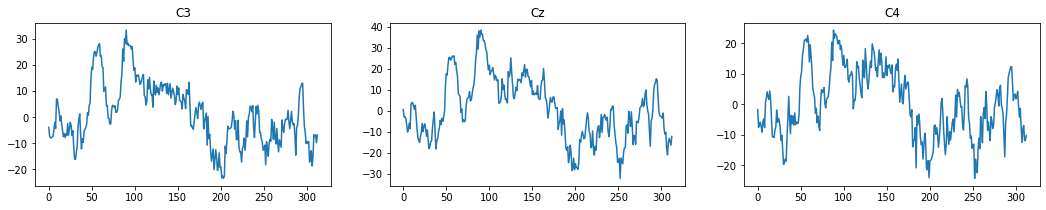

In [16]:
signal_overview(eeg_dataset[772][0], chan_list)

In [17]:
def eeg_save(eeg_dataset, filename):
    np.save(filename + '.npy', eeg_dataset)
    
eeg_save(eeg_dataset, 'A01T')

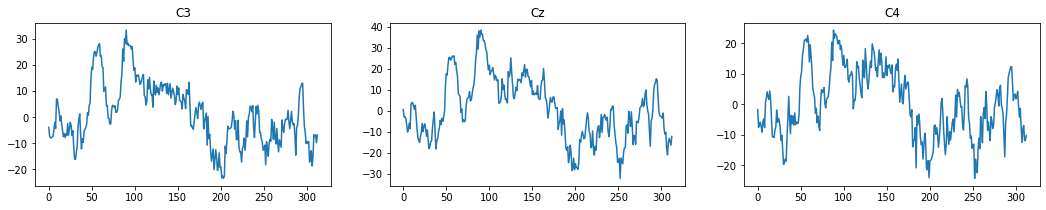

In [18]:
def load_eeg(filename):
    return np.load(filename + '.npy', allow_pickle = True).item()

test = load_eeg('A01T')
signal_overview(test[772][0], chan_list)

In [19]:
from data_extractor import Extractor

eeg_test = Extractor('/home/dhz/bci-data/data/A01T')

In [20]:
sig_test = eeg_test.eeg_classification()

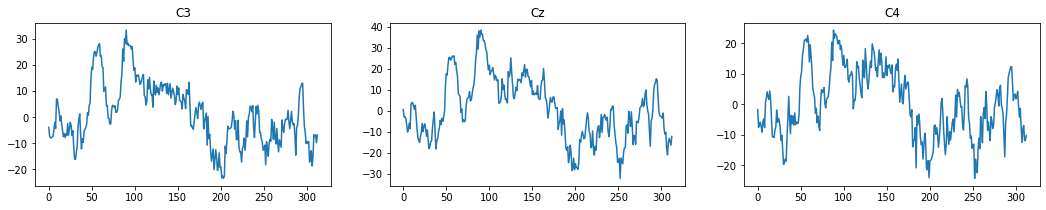

In [21]:
signal_overview(sig_test[772][0], chan_list)

In [22]:
print(sig_test[769][0][2].shape)

(313,)


In [23]:
def data_normalization(eeg_data):
    labels = []
    data = []
    for l in [769, 770, 771, 772]:
        for i in range(len(eeg_data[l])):
            labels.append(l)
            eeg_data[l][i] = [np.pad(x, (0, 512 - len(x)), 'constant') for x in eeg_data[l][i]]
            data.append([x.reshape((len(x), 1)) for x in eeg_data[l][i]])
            
    return np.array(labels), np.array(data)
labels, data = data_normalization(sig_test)
print('shape of labels:', labels.shape)
print('shape of data:', data.shape)

shape of labels: (288,)
shape of data: (288, 3, 512, 1)


In [24]:
print(data)

[[[[  4.6875    ]
   [  5.02929688]
   [  4.58984375]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  5.61523438]
   [  3.75976562]
   [  2.44140625]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.24414062]
   [  0.14648438]
   [  0.9765625 ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]]


 [[[  0.43945312]
   [ -3.41796875]
   [  5.95703125]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  8.0078125 ]
   [  0.68359375]
   [  8.05664062]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[ 11.47460938]
   [  2.5390625 ]
   [  8.3984375 ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]]


 [[[  9.61914062]
   [ 13.42773438]
   [  3.515625  ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[ 10.88867188]
   [ 12.93945312]
   [  2.9296875 ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[ 12.54882812]
   [ 13.91601562]
   [  6.34765625]
   ...

In [1]:
# get dependency
import numpy as np
import scipy.io

In [2]:
# load matlab files
t = scipy.io.loadmat('/home/dhz/bci-data/data/A02T.mat', struct_as_record=True)

In [3]:
# show the keys of matlab files
t.keys()

dict_keys(['__header__', '__version__', '__globals__', 'hA02T', 'sA02T'])

In [6]:
print(t['sA02T'].shape)
signals = t['sA02T']

(677169, 25)


In [7]:
typ = t['hA02T']['EVENT'][0][0]['TYP'][0][0] # type of the event